# Machine Learning HW2 Junhan Li

## 1. Data Description

In [1]:
import numpy as np
import random
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv('C:/Users/lenovo/Desktop/bank.csv', sep=';')
df.tail()

C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [2]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

#### There is no missing values in the dataset.

In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


#### From the description, we could see that this dataset is quite imbalance. The variations for some features are large.


## 2. Normalize and Devide the dataset


### Because there are string variables, we need to convert it to numerical and float variables.

In [4]:
for i in df:
    print ('%s' %i, type(df[i].iloc[0]))

('age', <type 'numpy.int64'>)
('job', <type 'str'>)
('marital', <type 'str'>)
('education', <type 'str'>)
('default', <type 'str'>)
('balance', <type 'numpy.int64'>)
('housing', <type 'str'>)
('loan', <type 'str'>)
('contact', <type 'str'>)
('day', <type 'numpy.int64'>)
('month', <type 'str'>)
('duration', <type 'numpy.int64'>)
('campaign', <type 'numpy.int64'>)
('pdays', <type 'numpy.int64'>)
('previous', <type 'numpy.int64'>)
('poutcome', <type 'str'>)
('y', <type 'str'>)


### Strings: job, marital, education, default, housing, loan, contact, month, poutcome

Then we would convert the strings variables to numerical variables.

In [5]:
#define a function to convert categorical variables
def convert_cat(col):
    categories = pd.unique(col)
    catcount = len(categories)
    dictvalues = list(range(catcount))
    catdict = dict(zip(categories, dictvalues))
    col = col.map(lambda x : catdict[x])
    return col
cat_features = ['job', 'marital', 'education', 'default', 'loan', 'housing', 'contact', 'month','poutcome', 'y']
for i in cat_features:
    df[i] = convert_cat(df[i])

    
# Consider all features first

cat = pd.unique(df['y'])
y = np.array(df['y'])
features_name = list(df.columns)
features_name.remove('y')

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# devide training/test sets, 30 percent test data and 70 percent training data

sample_features = random.sample(features_name, len(features_name))
X = np.array(df[sample_features])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)

# normalize

sample_features = random.sample(features_name, len(features_name))
X = np.array(df[sample_features])
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C:\Users\lenovo\Anaconda2\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
# define plot_decision_regions

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    edgecolor='black',
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')


# 3. Training


## We use SVM to train the data

In [7]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=5.0, class_weight = {1: 10})
svm.fit(X_train_std, y_train)

from sklearn.metrics import accuracy_score
y_pred = svm.predict(X_test_std)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.80


### To find the best features pairs, we need to generate and test all the possible combinations of features.

In [10]:
def train(x_train, y_train, x_test, y_test):
    result = []
    svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=5.0, class_weight = {1: 10})
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    result.append(accuracy_score(y_test, y_pred))
    a = pd.DataFrame({'test': y_test, 'pred': y_pred})
    correct_1 = len(a[(a['test'] == 1) & (a['test'] == a['pred'])]) / len(a[(a['test'] == 1)])
    correct_0 = len(a[(a['test'] == 0) & (a['test'] == a['pred'])]) / len(a[(a['test'] == 0)])
    result.append(correct_1)
    result.append(correct_0)
    return result

sample_features = features_name
count = 0
finaldict = {}
for i in sample_features:
    for j in sample_features:
        if i == j:
            continue
        X = np.array(df[[i, j]])
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=1)
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        result = train(X_train_std, y_train, X_test_std, y_test)
        print (i, j)
        finaldict[i + '-' + j] = result
        count += 1

('age', 'job')
('age', 'marital')
('age', 'education')
('age', 'default')
('age', 'balance')
('age', 'housing')
('age', 'loan')
('age', 'contact')
('age', 'day')
('age', 'month')
('age', 'duration')
('age', 'campaign')
('age', 'pdays')
('age', 'previous')
('age', 'poutcome')
('job', 'age')
('job', 'marital')
('job', 'education')
('job', 'default')
('job', 'balance')
('job', 'housing')
('job', 'loan')
('job', 'contact')
('job', 'day')
('job', 'month')
('job', 'duration')
('job', 'campaign')
('job', 'pdays')
('job', 'previous')
('job', 'poutcome')
('marital', 'age')
('marital', 'job')
('marital', 'education')
('marital', 'default')
('marital', 'balance')
('marital', 'housing')
('marital', 'loan')
('marital', 'contact')
('marital', 'day')
('marital', 'month')
('marital', 'duration')
('marital', 'campaign')
('marital', 'pdays')
('marital', 'previous')
('marital', 'poutcome')
('education', 'age')
('education', 'job')
('education', 'marital')
('education', 'default')
('education', 'balance')

In [11]:
finaldf = pd.DataFrame(finaldict)
finaldf = finaldf.T
finaldf.columns = ['Total Accuracy','Accuracy of 1', 'Accuracy of 0']
finaldf[finaldf['Total Accuracy'] > 0.78]

,Total Accuracy,Accuracy of 1,Accuracy of 0
duration-poutcome,0.787767,0.0,0.0
poutcome-duration,0.787767,0.0,0.0


### Then we have found duration-poutcome is the best combination of features with the accuracy.

In [8]:
X = np.array(df[['duration', 'poutcome']])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

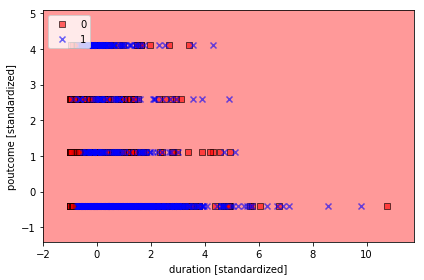

In [9]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.001, C=5.0, class_weight = {1: 10})#Class_Weight to handle imbalance data
svm.fit(X_train, y_train)
X = np.array(df[sample_features])
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm)
plt.xlabel('duration [standardized]')
plt.ylabel('poutcome [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()